In [24]:
from utils.gdrive_access import GoogleDriveAccess
from tqdm import tqdm
import os

%reload_ext autoreload
%autoreload 2

In [14]:
folder_id = "1tgAXP79aytaH19ws4rBVq6Ir-oTQj9_Z"  # Replace with actual folder ID
local_folder = "./data"       # Change to desired local path

gdrive_downloader = GoogleDriveAccess()
gdrive_downloader.download_files_recursive(folder_id, local_folder)

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=248270700232-6220rfekcna210nhtb833b3os62832o6.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.
Portfolio 📁
No file in this folder
Resume 📁
⦿ CV_YASMIN.pdf ✅
⦿ CV_Taufiqurrahman.pdf ✅
⦿ CV Sella Novanda.pdf ✅
⦿ CV - Salman Ananda M.S - ATS - New.pdf ✅
⦿ Riandy Enrisa CV.pdf ✅
⦿ CV_Rezky Kurniawan.pdf ✅
⦿ Rendi Abiem Pamungkas-CV - Rendi Abiem Pamungkas.pdf ✅
⦿ cv Anwar new.pdf ✅
⦿ Kelly Chan_CV.pdf ✅
⦿ JACKY CHANDRA-resume.pdf ✅
⦿ Himawan Rizky Syaputra - CV.pdf ✅
⦿ Ferny Indy.pdf ✅
⦿ FerenFasella_CV_Mar23.pdf ✅
⦿ Erwindi - CV.pdf ✅
⦿ Elfa zahara-CV.pdf ✅
⦿ Boby Hartanto - College Student - CV.pdf ✅
⦿ CV Asmawati PCR LX - asmawati _.pdf ✅
⦿ Amatullah_Shafiyyah_CV.pdf ✅
⦿ Yuni Lestari - CV.pdf ✅
⦿ Bayu-Rujito-CV.pdf ✅
⦿ rega-ayundya-putri-cv.pdf ✅
⦿ A

In [10]:
from pymilvus import MilvusClient
from utils.colpali_retriever import MilvusColbertRetriever, MilvusPDFImageRetriever

%reload_ext autoreload
%autoreload 2

client = MilvusClient(uri="http://localhost:19530")
retriever = MilvusPDFImageRetriever(client, "candidate_embeddings")
retriever.create_collection()
retriever.create_index()
retriever.create_scalar_index()

Loading checkpoint shards: 100%|██████████| 2/2 [01:06<00:00, 33.01s/it]


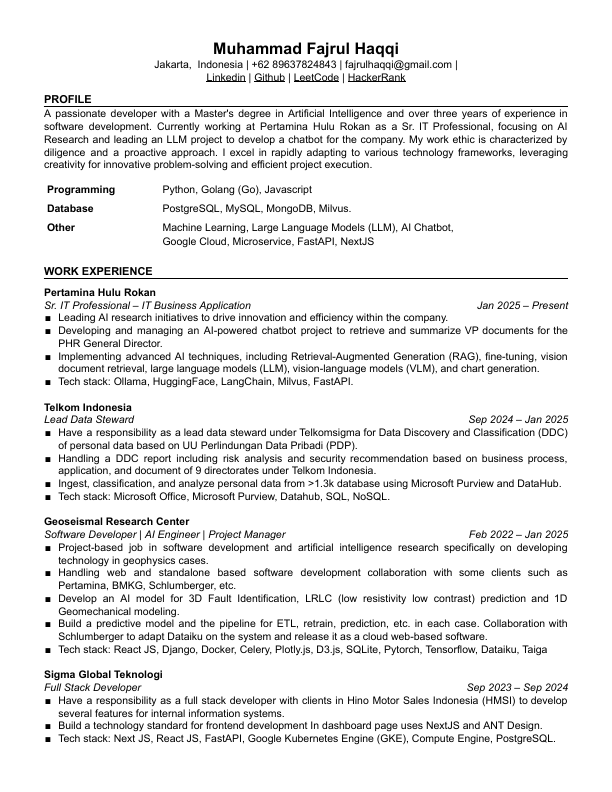

In [2]:
filepath = "data/Resume/CV - M Fajrul Haqqi (Feb 25).pdf"
img, pgn = retriever.extract_images_from_pdf(filepath)
img[0]

In [3]:
vectors = retriever.store_pdf_images_in_milvus(filepath)
vectors

Process embedding image: 100%|██████████| 2/2 [03:16<00:00, 98.40s/it]


[tensor([[-0.0577,  0.0198, -0.0492,  ..., -0.0847,  0.0115,  0.0542],
         [-0.0558, -0.0581, -0.0813,  ..., -0.0327,  0.0061,  0.0418],
         [ 0.0223,  0.1245, -0.0196,  ..., -0.0047, -0.0496, -0.0180],
         ...,
         [-0.1040,  0.0154,  0.0959,  ..., -0.0811, -0.1524,  0.0304],
         [-0.0422,  0.1013,  0.1336,  ..., -0.0418, -0.1903, -0.0477],
         [-0.0245,  0.1421,  0.1396,  ..., -0.0343, -0.2049, -0.0761]]),
 tensor([[-0.1356,  0.0917, -0.0138,  ..., -0.0884,  0.0303,  0.1892],
         [-0.0544,  0.0546, -0.0062,  ..., -0.1394, -0.1383,  0.0877],
         [-0.0533,  0.0196,  0.0550,  ..., -0.1281, -0.1253,  0.0097],
         ...,
         [-0.0989,  0.0299,  0.0789,  ..., -0.0834, -0.1469,  0.0210],
         [-0.0283,  0.1006,  0.1119,  ..., -0.0450, -0.1674, -0.0640],
         [-0.0095,  0.1575,  0.1369,  ..., -0.0437, -0.1908, -0.0999]])]

In [31]:
retriever.create_collection()
retriever.create_index()
retriever.create_scalar_index()

for page_num, vector in enumerate(tqdm(vectors), start=1):
    data = dict(
        colbert_vecs=vector.float().numpy(),
        document_id=1,
        document_path=os.path.abspath(filepath),
        page_number=page_num
    )
    retriever.insert(data)

100%|██████████| 2/2 [00:00<00:00, 10.44it/s]


In [28]:
data

{'colbert_vecs': array([[-0.13558388,  0.09165824, -0.01377217, ..., -0.08836804,
          0.03029074,  0.1891631 ],
        [-0.05438638,  0.0545536 , -0.00616048, ..., -0.13944976,
         -0.13826048,  0.08765434],
        [-0.05330354,  0.01962343,  0.05497638, ..., -0.12810253,
         -0.12533915,  0.00968109],
        ...,
        [-0.09894729,  0.02991854,  0.07887661, ..., -0.08344707,
         -0.14686851,  0.02099123],
        [-0.02828413,  0.10059346,  0.11193505, ..., -0.04502674,
         -0.16737503, -0.06401816],
        [-0.00948673,  0.1574668 ,  0.13693388, ..., -0.04373854,
         -0.19077821, -0.09986286]], shape=(1030, 128), dtype=float32),
 'document_id': 1,
 'document_path': '/Users/fajrulhaqqi/Public/Career/PHR_ITBA/hackathon/ioc_forum_2025/data/Resume/CV - M Fajrul Haqqi (Feb 25).pdf',
 'page_number': 2}